In [ ]:
cd /content/drive/MyDrive/helmet_detection/training_demo/models/research

/content/drive/MyDrive/helmet_detection/training_demo/models/research


In [ ]:
!protoc object_detection/protos/*.proto --python_out=.

In [ ]:
!git clone https://github.com/cocodataset/cocoapi.git

fatal: destination path 'cocoapi' already exists and is not an empty directory.


In [ ]:
cd cocoapi/PythonAPI

/content/drive/MyDrive/helmet_detection/training_demo/models/research/cocoapi/PythonAPI


In [ ]:
!make

python setup.py build_ext --inplace
running build_ext
skipping 'pycocotools/_mask.c' Cython extension (up-to-date)
building 'pycocotools._mask' extension
creating build
creating build/common
creating build/temp.linux-x86_64-cpython-310
creating build/temp.linux-x86_64-cpython-310/pycocotools
x86_64-linux-gnu-gcc -pthread -Wno-unused-result -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.10/dist-packages/numpy/core/include -I../common -I/usr/include/python3.10 -c ../common/maskApi.c -o build/temp.linux-x86_64-cpython-310/../common/maskApi.o -Wno-cpp -Wno-unused-function -std=c99
../common/maskApi.c: In function ‘rleDecode’:
../common/maskApi.c:46:7: warning: this ‘for’ clause does not guard... [-Wmisleading-indentation]
   46 |       for( k=0; k<R[i].cnts[j]; k++ ) *(M++)=v; v=!v; }}
      |       ^~~
../common/maskApi.c:46:49: note: ...this statement, but the latter is misleadingly i

In [ ]:
cp -r pycocotools '/content/drive/MyDrive/helmet_detection/training_demo/models/research'

In [ ]:
!pip install --upgrade numpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached numpy-1.25.0-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
apache-beam 2.48.0 requires numpy<1.25.0,>=1.14.3, but you have numpy 1.25.0 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.0 which is incompatible.


In [ ]:
cd /content/drive/MyDrive/helmet_detection/training_demo

/content/drive/MyDrive/helmet_detection/training_demo


In [ ]:
%%bash
sudo apt install -y protobuf-compiler
cd models/research/
protoc object_detection/protos/*.proto --python_out=.
cp object_detection/packages/tf2/setup.py .
python -m pip install .

Reading package lists...
Building dependency tree...
Reading state information...
protobuf-compiler is already the newest version (3.6.1.3-2ubuntu5.2).
0 upgraded, 0 newly installed, 0 to remove and 13 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing /content/drive/My Drive/helmet_detection/training_demo/models/research/cocoapi/PythonAPI
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for pycocotools: filename=pycocotools-2.0-cp310-cp310-linux_x86_64.whl size=386386 sha256=eadeab9a96b2c188a4f71c66449e83c150982090930cd223511f4a606dc4a430
  Stored in directory: /tmp/pip-ephem-wheel-cache-p3chvg7f/wheels/37/83/5f/ba94bb3caba73e469941545c8708d51fe4533bbabc2d4760d6
Successfully built pycocotools
  Attempting uninstall: pycocotools
    Found existing installation: pycocotools 2.0
    Uninstalling pycocotools-2.0:
      Successfully uninstalled pycoc



bash: line 2: cd: models/research/: No such file or directory
object_detection/protos/*.proto: No such file or directory
cp: cannot stat 'object_detection/packages/tf2/setup.py': No such file or directory


In [ ]:
"""
Object Detection (On Image) From TF2 Saved Model
=====================================
"""

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf
import cv2
import argparse
from google.colab.patches import cv2_imshow

# Enable GPU dynamic memory allocation
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


# PROVIDE PATH TO MODEL DIRECTORY
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/helmet_detection/training_demo/exported_models/my_model'

# PROVIDE PATH TO LABEL MAP
PATH_TO_LABELS = '/content/drive/MyDrive/helmet_detection/training_demo/data/labelmap.pbtxt'

# PROVIDE THE MINIMUM CONFIDENCE THRESHOLD
MIN_CONF_THRESH = float(0.2)

# LOAD THE MODEL

import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils
from object_detection.utils import config_util
from object_detection.builders import model_builder

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

configs = config_util.get_configs_from_pipeline_file("/content/drive/MyDrive/helmet_detection/training_demo/exported_models/my_model/pipeline.config")
detection_model = model_builder.build(model_config=configs['model'], is_training=False)

# Restore checkpoint
ckpt = tf.compat.v2.train.Checkpoint(model=detection_model)
ckpt.restore(os.path.join("/content/drive/MyDrive/helmet_detection/training_demo/models/ssd_resnet101_v1_fpn_640x640_coco17_tpu-8/ckpt-10")).expect_partial()

print('Loading model...', end='')
start_time = time.time()

# LOAD SAVED MODEL AND BUILD DETECTION FUNCTION
# detect_fn = tf.saved_model.load(PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 3.886222839355469e-05 seconds


Running inference for /content/drive/MyDrive/helmet_detection/training_demo/download.jpeg... Done


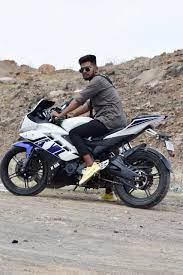

In [ ]:
# LOAD LABEL MAP DATA FOR PLOTTING

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/helmet_detection/training_demo/images/Train/original_BikesHelmets612.png'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
# input_tensor = input_tensor[tf.newaxis, ...]
input_tensor = tf.convert_to_tensor(np.expand_dims(input_tensor, 0), dtype=tf.float32)

# input_tensor = np.expand_dims(image_np, 0)
detections = detection_model(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=5,
      min_score_thresh=0.3,
      agnostic_mode=True)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


Running inference for /content/drive/MyDrive/helmet_detection/training_demo/images/Train/original_BikesHelmets125.png... Done


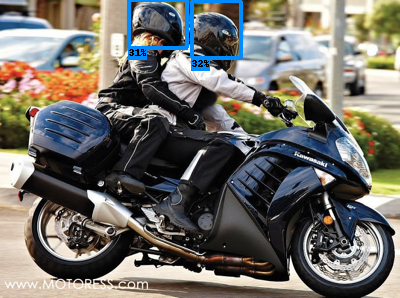

In [ ]:
# LOAD LABEL MAP DATA FOR PLOTTING

# PROVIDE PATH TO IMAGE DIRECTORY
IMAGE_PATHS = '/content/drive/MyDrive/helmet_detection/training_demo/images/Train/original_BikesHelmets125.png'

category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
                                                                    use_display_name=True)

import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.
    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.
    Args:
      path: the file path to the image
    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))




print('Running inference for {}... '.format(IMAGE_PATHS), end='')

image = cv2.imread(IMAGE_PATHS)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_expanded = np.expand_dims(image_rgb, axis=0)

# The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
input_tensor = tf.convert_to_tensor(image)
# The model expects a batch of images, so add an axis with `tf.newaxis`.
# input_tensor = input_tensor[tf.newaxis, ...]
input_tensor = tf.convert_to_tensor(np.expand_dims(input_tensor, 0), dtype=tf.float32)

# input_tensor = np.expand_dims(image_np, 0)
detections = detection_model(input_tensor)

# All outputs are batches tensors.
# Convert to numpy arrays, and take index [0] to remove the batch dimension.
# We're only interested in the first num_detections.
num_detections = int(detections.pop('num_detections'))
detections = {key: value[0, :num_detections].numpy()
               for key, value in detections.items()}
detections['num_detections'] = num_detections

# detection_classes should be ints.
detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

image_with_detections = image.copy()

# SET MIN_SCORE_THRESH BASED ON YOU MINIMUM THRESHOLD FOR DETECTIONS
viz_utils.visualize_boxes_and_labels_on_image_array(
      image_with_detections,
      detections['detection_boxes'],
      detections['detection_classes'],
      detections['detection_scores'],
      category_index,
      use_normalized_coordinates=True,
      max_boxes_to_draw=5,
      min_score_thresh=0.3,
      agnostic_mode=True)

print('Done')
# DISPLAYS OUTPUT IMAGE
cv2_imshow(image_with_detections)
# CLOSES WINDOW ONCE KEY IS PRESSED


In [ ]:
print(detections['detection_classes'])

In [ ]:
print(detections['detection_scores'])

[0.25928423 0.20772487 0.20604897 0.20327796 0.15366095 0.1535576
 0.14834431 0.14455496 0.14352393 0.1404949  0.13492526 0.11646274
 0.11329784 0.11255992 0.11015064 0.10932835 0.10881889 0.10801503
 0.10742649 0.10674492 0.10414495 0.10300176 0.10042562 0.09931898
 0.09732478 0.09430663 0.09040016 0.08790874 0.08721522 0.08639138
 0.0860512  0.08584633 0.0854224  0.08530261 0.08418175 0.08335688
 0.08277103 0.08220885 0.08009735 0.07971949 0.07891769 0.07822238
 0.07791529 0.0771032  0.07586556 0.07535342 0.07489441 0.07469507
 0.07452232 0.0745045  0.07282216 0.0727621  0.07207129 0.07180883
 0.07088036 0.06992128 0.06918191 0.06910222 0.06814226 0.06810243
 0.06804934 0.06789689 0.06754927 0.06686204 0.06612629 0.06565811
 0.06526998 0.06510861 0.06475777 0.06462232 0.06428445 0.06353537
 0.06291267 0.06245115 0.0623236  0.06209448 0.06147398 0.06072071
 0.06054309 0.06043825 0.06016237 0.05973995 0.05965959 0.05956224
 0.0595153  0.05938391 0.05930842 0.05918282 0.05877305 0.05863